<a href="https://colab.research.google.com/github/Nyan-dwaro/Advert-Firm-Sales-Prediction-Using-Linear-Regression/blob/main/heightStata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas==1.2.0

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
height = pd.read_csv('/content/height.csv')
height.tail()

,id,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand
65,66,76,64,M,24.889480,69,NaN,R,L,R
66,67,69,68,F,39.092499,65,169.0,R,R,R
67,68,69,70,M,38.423983,68,191.0,R,R,L
68,69,69,59,F,38.866372,65,141.0,R,R,L
69,70,71,62,F,44.111746,69,157.0,R,R,R


In [ ]:
height.columns

Index(['id', 'dad_height', 'mom_height', 'sex', 'age', 'height', 'weight',
       'hand', 'dad_hand', 'mom_hand'],
      dtype='object')

In [ ]:
height.shape

(70, 10)

In [ ]:
height.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          70 non-null     int64  
 1   dad_height  70 non-null     int64  
 2   mom_height  70 non-null     int64  
 3   sex         70 non-null     object 
 4   age         70 non-null     float64
 5   height      70 non-null     int64  
 6   weight      67 non-null     float64
 7   hand        70 non-null     object 
 8   dad_hand    70 non-null     object 
 9   mom_hand    70 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.6+ KB


In [ ]:
height.count()

id            70
dad_height    70
mom_height    70
sex           70
age           70
height        70
weight        67
hand          70
dad_hand      70
mom_hand      70
dtype: int64

In [ ]:
height.weight.fillna(0, inplace = True)

In [ ]:
height.sex.replace({'Mm':'M', 'f':'F'}, inplace = True)

In [ ]:
height.sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
height.isna().sum()

id            0
dad_height    0
mom_height    0
sex           0
age           0
height        0
weight        0
hand          0
dad_hand      0
mom_hand      0
dtype: int64

In [ ]:
height.describe()

,id,dad_height,mom_height,age,height,weight
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,35.457143,69.542857,63.700000,39.244620,68.271429,154.000000
std,20.303270,15.218872,4.267674,9.247374,4.050126,36.639252
min,1.000000,7.000000,55.000000,17.589613,61.000000,0.000000
25%,18.250000,68.000000,61.000000,33.544504,65.000000,148.000000
50%,35.500000,69.000000,63.000000,39.098830,68.000000,156.500000
75%,52.750000,71.000000,67.000000,44.301489,71.000000,169.000000
max,70.000000,176.000000,76.000000,65.046529,78.000000,205.000000


In [ ]:
height.drop('id', axis = 1 , inplace = True)

In [ ]:
height['dad_hand']

0     R
1     R
2     R
3     R
4     R
     ..
65    L
66    R
67    R
68    R
69    R
Name: dad_hand, Length: 70, dtype: object

In [ ]:
#height.('dad_hand')

In [ ]:
height['BMI'] = (height['weight']*0.4536)/ ((height['height']*0.0254 )* (height['height']*0.0254))

In [ ]:
height.head(4)

,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI
0,64,66,M,39.105161,65,155.0,R,R,R,25.793519
1,60,59,M,37.033271,76,164.0,R,R,R,19.962838
2,76,65,M,41.616987,76,136.0,R,R,R,16.554548
3,69,63,F,44.324557,63,185.0,R,R,R,32.771494


In [ ]:
height['BMI'].mean()

23.458683447090447

In [ ]:
height['BMI'].median()

23.838872445964256

<function matplotlib.pyplot.show(*args, **kw)>

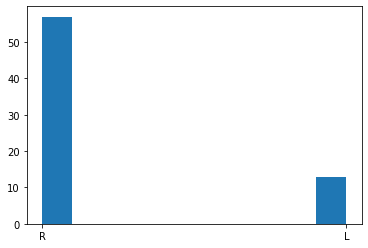

In [ ]:
import matplotlib.pyplot as plt
hand = height['hand']
plt.hist(hand)
plt.show

In [ ]:
height.hand.replace({"R":0, "L":1} , inplace = True )

In [ ]:
height.head()

,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI
0,64,66,M,39.105161,65,155.0,0,R,R,25.793519
1,60,59,M,37.033271,76,164.0,0,R,R,19.962838
2,76,65,M,41.616987,76,136.0,0,R,R,16.554548
3,69,63,F,44.324557,63,185.0,0,R,R,32.771494
4,68,66,F,39.661683,63,152.0,0,R,R,26.925768


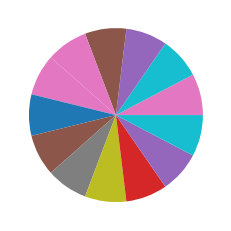

In [ ]:

a = height['hand']
plt.pie(a)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

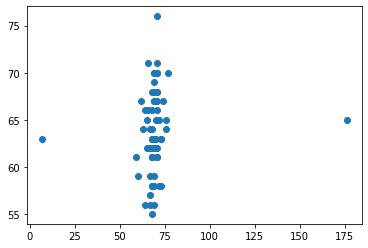

In [ ]:
x = height['dad_height']
y = height['mom_height']
plt.scatter(x,y)
plt.show

In [ ]:
height.hand.unique()

array([0, 1])

<function matplotlib.pyplot.show(*args, **kw)>

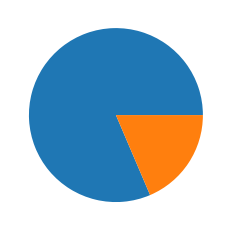

In [ ]:

q = height['hand'].value_counts()
plt.pie(q)
plt.show

In [ ]:
height.loc[height['BMI']<=18.4, 'BMIcat'] = 'under'
#height['BMIcat'].between(18.5,24.5) ='normal'
height.loc[height['BMI']>=25, 'BMIcat'] = 'over'
#height['BMIcat'] = height['BMI'].between(18.5,24.5) ==  'normal'

In [ ]:
(height[(height['BMI']>=18.4)&(height['BMI']<=24.4)])
height.fillna('normal', inplace = True)

In [ ]:
height.head()

,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI,BMIcat
0,64,66,M,39.105161,65,155.0,0,R,R,25.793519,over
1,60,59,M,37.033271,76,164.0,0,R,R,19.962838,normal
2,76,65,M,41.616987,76,136.0,0,R,R,16.554548,under
3,69,63,F,44.324557,63,185.0,0,R,R,32.771494,over
4,68,66,F,39.661683,63,152.0,0,R,R,26.925768,over


In [ ]:
height['gender'] = (height['sex'])
height.gender.replace({'M':'Male', 'F':'Female'}, inplace = True)

In [ ]:
height.head()

,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI,BMIcat,gender
0,64,66,M,39.105161,65,155.0,0,R,R,25.793519,over,Male
1,60,59,M,37.033271,76,164.0,0,R,R,19.962838,normal,Male
2,76,65,M,41.616987,76,136.0,0,R,R,16.554548,under,Male
3,69,63,F,44.324557,63,185.0,0,R,R,32.771494,over,Female
4,68,66,F,39.661683,63,152.0,0,R,R,26.925768,over,Female


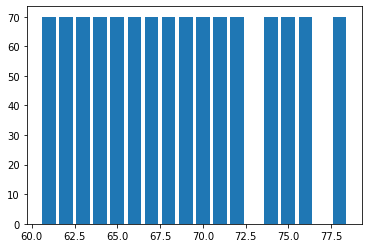

In [ ]:

cat = height['height']
atc = cat.count()
plt.bar(cat,atc)
plt.show()

In [ ]:
height.BMIcat.value_counts()

normal    36
over      28
under      6
Name: BMIcat, dtype: int64

In [ ]:
height[['BMIcat', 'gender']].value_counts()

BMIcat  gender
normal  Female    20
        Male      16
over    Female    16
        Male      12
under   Male       5
        Female     1
dtype: int64

In [ ]:
height['age'].between(20,30).value_counts()

False    59
True     11
Name: age, dtype: int64

In [ ]:
height[['BMIcat','hand', 'gender']].value_counts()

BMIcat  hand  gender
normal  0     Female    16
              Male      15
over    0     Female    12
              Male      10
normal  1     Female     4
over    1     Female     4
under   0     Male       3
over    1     Male       2
under   1     Male       2
normal  1     Male       1
under   0     Female     1
dtype: int64

In [ ]:
#(height.age > 30).value_counts()

height[['gender','hand','BMIcat']].value_counts()

gender  hand  BMIcat
Female  0     normal    16
Male    0     normal    15
Female  0     over      12
Male    0     over      10
Female  1     normal     4
              over       4
Male    0     under      3
        1     over       2
              under      2
Female  0     under      1
Male    1     normal     1
dtype: int64

In [ ]:
#i = height['height']
#y = height
#plt.box(i,y)
#plt.show()


In [ ]:
(height.gender == 'Female').sum() 
#(height.hand == 0).sum()

37

In [ ]:
b = height[['hand','gender','BMIcat']].value_counts()[0,'Female','over']

In [ ]:
a = (height['age']>=30).sum()
print(a)

57


In [ ]:
c = [(a) & (b)]
print(c)

[8]


In [ ]:
len((height[(height['age']>=30) & (height['hand']==0) &(height['BMIcat']=='normal') & (height['gender']=='Female')]))


12

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf831d5410>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf831e6b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf830bae50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf83223110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf83223e10>],
 'means': []}

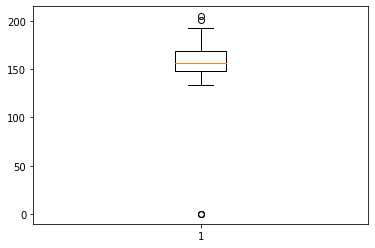

In [ ]:
plt.boxplot(height.weight)